You are given a tree (i.e. a connected, undirected graph that has no cycles) rooted at node 0 consisting of n nodes numbered from 0 to n - 1. The tree is represented by a 0-indexed array parent of size n, where parent[i] is the parent of node i. Since node 0 is the root, parent[0] == -1.

You are also given a string s of length n, where s[i] is the character assigned to node i.

Return the length of the longest path in the tree such that no pair of adjacent nodes on the path have the same character assigned to them.

 

Example 1:

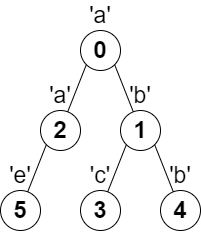

Input: parent = [-1,0,0,1,1,2], s = "abacbe"
Output: 3
Explanation: The longest path where each two adjacent nodes have different characters in the tree is the path: 0 -> 1 -> 3. The length of this path is 3, so 3 is returned.
It can be proven that there is no longer path that satisfies the conditions. 

Example 2:

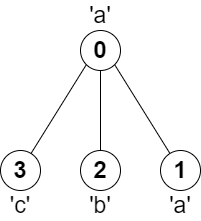

Input: parent = [-1,0,0,0], s = "aabc"
Output: 3
Explanation: The longest path where each two adjacent nodes have different characters is the path: 2 -> 0 -> 3. The length of this path is 3, so 3 is returned.

 

Constraints:

    n == parent.length == s.length
    1 <= n <= 105
    0 <= parent[i] <= n - 1 for all i >= 1
    parent[0] == -1
    parent represents a valid tree.
    s consists of only lowercase English letters.



In [ ]:
class Solution:
    def longestPath(self, parent: List[int], s: str) -> int:
        tree = defaultdict(list)
        for end, start in enumerate(parent):
            tree[start].append(end)
        
        res = 1
        
        def dfs(node):
            nonlocal res
            max1 = max2 = 0

            for nei in tree[node]:
                neiL = dfs(nei)
                if s[nei] != s[node]:
                    if neiL > max1:
                        max2 = max1
                        max1 = neiL
                    elif neiL > max2:
                        max2 = neiL

            res = max(res, max1 + max2 + 1)

            return max1 + 1
        
        dfs(0)
        return res